# LABORATORIO 2 REGRESION
### REGRESIÓN LINEAL MULTIVARIABLE, UNA REGRESIÓN POLINÓMICA Y EL CÁLCULO POR LA ECUACIÓN DE LA NORMAL

In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
# accedemos a nuestro drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset_Drive/LAB2_BicicletasPrestadas.csv', delimiter=',')

In [4]:
#mostramos el dataset
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes que podrian tener las columnas X
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

DATOS VACIOS
instan

## PROCESAMIENTO DE DATOS

In [6]:
#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "cnt"
indice_columna = data.columns.get_loc('cnt')
columnas = list(data.columns)
columnas.pop(indice_columna)
columnas.append('cnt')
data = data[columnas]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Eliminar columnas no deseadas
data = data.drop(columns=['dteday', 'instant', 'workingday', 'holiday', 'yr'])

# Seleccionar solo las primeras 10,000 filas
data = data.iloc[:10000]

# Mostrar el DataFrame resultante
data



,season,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,2,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,3,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,4,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,12,0,1,0.30,0.3030,0.39,0.1343,49,256,305
9996,1,2,13,0,1,0.32,0.3333,0.36,0.0000,58,267,325
9997,1,2,14,0,1,0.34,0.3485,0.31,0.0000,68,263,331
9998,1,2,15,0,1,0.36,0.3485,0.29,0.0000,72,281,353


In [8]:
# Dividir el dataset en características (X) y etiquetas (y) para regresión,
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42) # 80% training y 20% test
X_regre_test = test_dataset.drop(['cnt'], axis=1).values # Datos de prueba
y_regre_test = test_dataset['cnt'].values # Etiquetas de prueba



In [9]:
# Seleccionamos las columnas para X y la columna 'cnt' para y
X_regre = train_dataset.drop(['cnt'], axis=1).values
y_regre = train_dataset['cnt'].values
m_regre = len(y_regre)

# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# Imprimir encabezados para las 11 columnas de X y la columna Y
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]',
    'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:,10]', 'Y'
))

# Imprimir una línea divisoria
print('-' * 100)

# Imprimir las primeras 10 filas del dataset con 11 columnas de características y la columna Y
for i in range(10):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.2f}'.format(
        X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5],
        X_regre[i, 6], X_regre[i, 7], X_regre[i, 8], X_regre[i, 9], X_regre[i, 10], y_regre[i]
    ))

  X[:,0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8] X[:, 9] X[:,10]       Y
----------------------------------------------------------------------------------------------------
       1       1      12       4       2       0       0       1       0      29     136  165.00
       1       3      12       4       3       0       0       0       0       4      30   34.00
       1       3       5       2       1       0       0       1       0       0      11   11.00
       3       9       5       5       1       0       0       1       0       2      30   32.00
       4      10      11       1       1       1       1       1       0     139     183  322.00
       3       9      18       5       1       1       1       1       0      33     377  410.00
       1       1      17       0       1       0       0       0       0      22     197  219.00
       4      12      17       5       1       0       0       0       0      20     391  411.00
       2       5       2  

###Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso
### Hacemos el uso de la siguiente funcion para normalizar los datos

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# Llama a featureNormalize con los datos cargados
X_norm, mu_regre, sigma_regre = featureNormalize(X_regre)

# Imprimir el encabezado para las 11 columnas de X_norm y la columna Y
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', 'X_norm[:, 1]', 'X_norm[:, 2]', 'X_norm[:, 3]', 'X_norm[:, 4]', 'X_norm[:, 5]',
    'X_norm[:, 6]', 'X_norm[:, 7]', 'X_norm[:, 8]', 'X_norm[:, 9]', 'X_norm[:,10]', 'Y'
))
print('-' * 120)  # Línea divisoria adaptada para 12 columnas

# Imprimir las primeras 10 filas del dataset normalizado
for i in range(10):
    print('{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5],
        X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], y_regre[i]
    ))

# Imprimir media y desviación estándar calculadas
print('Media calculada:', mu_regre)
print('Desviación estándar calculada:', sigma_regre)



X_norm[:,0]X_norm[:, 1]X_norm[:, 2]X_norm[:, 3]X_norm[:, 4]X_norm[:, 5]X_norm[:, 6]X_norm[:, 7]X_norm[:, 8]X_norm[:, 9]X_norm[:,10]         Y
------------------------------------------------------------------------------------------------------------------------
   -1.1360   -1.3392    0.0636    0.4960    0.8459   -0.6151   -0.6258    0.8854   -0.4795    0.0738    0.1693  165.0000
   -1.1360   -0.7893    0.0636    0.4960    2.3639   -0.2146   -0.1187   -3.2260    0.2415   -0.6058   -0.7877   34.0000
   -1.1360   -0.7893   -0.9528   -0.5000   -0.6721   -1.1156   -1.2171    0.5808    0.0009   -0.7145   -0.9592   11.0000
    0.6062    0.8605   -0.9528    0.9941   -0.6721   -0.4149   -0.2877    0.6316    0.0009   -0.6602   -0.7877   32.0000
    1.4773    1.1355   -0.0816   -0.9980   -0.6721    0.7865    0.8961    0.2763   -0.8393    3.0638    0.5936  322.0000
    0.6062    0.8605    0.9348    0.9941   -0.6721    1.1869    1.2342    0.7839    0.0009    0.1825    2.3451  410.0000
   -1.1360 

In [12]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', ms=10, mec='k')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

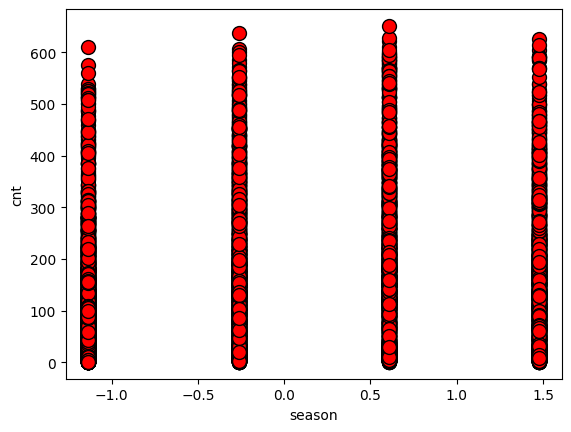

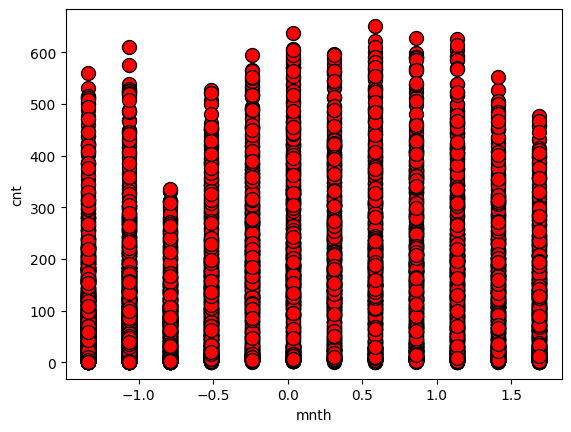

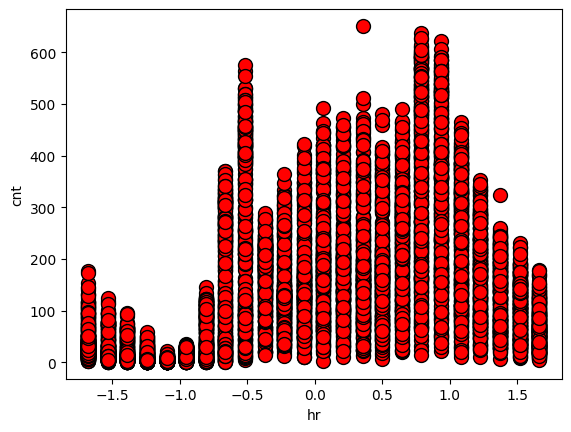

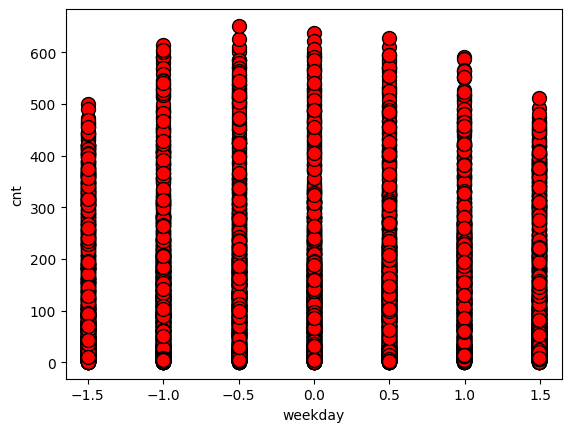

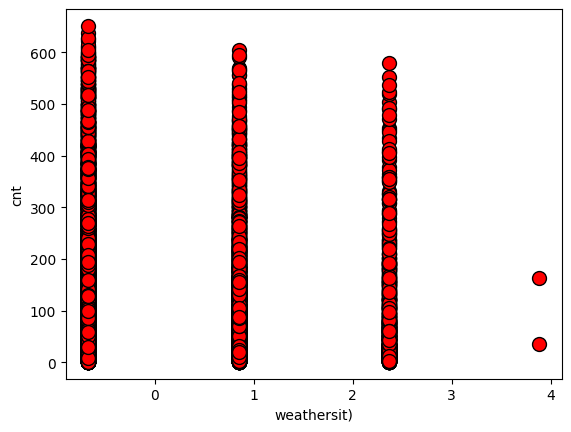

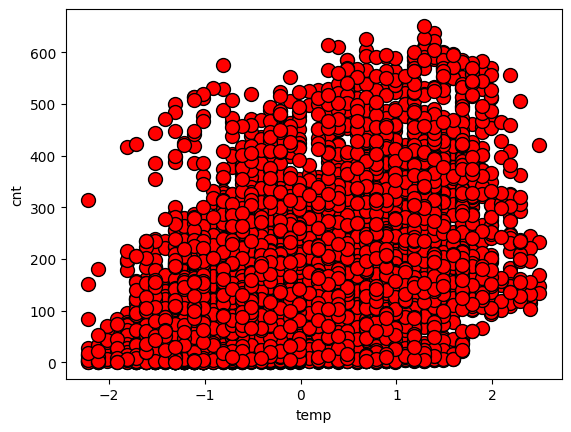

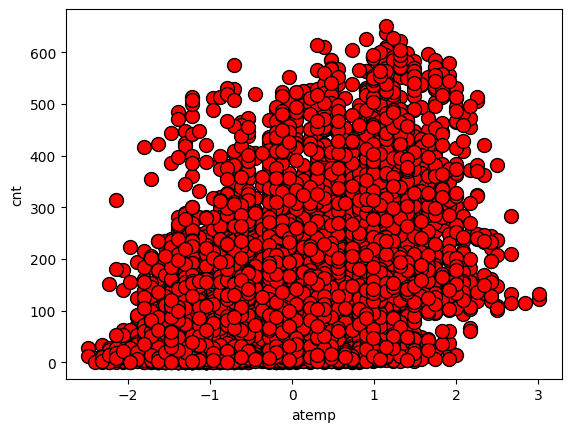

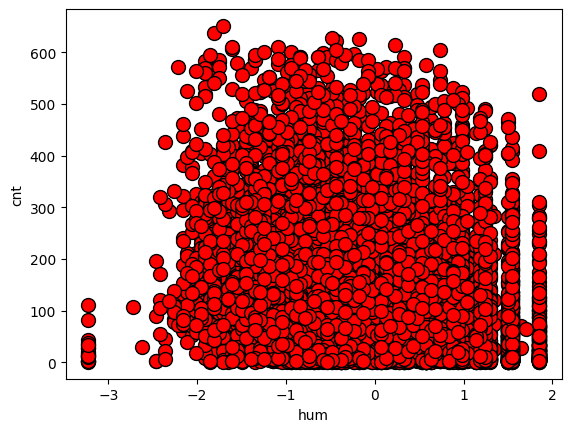

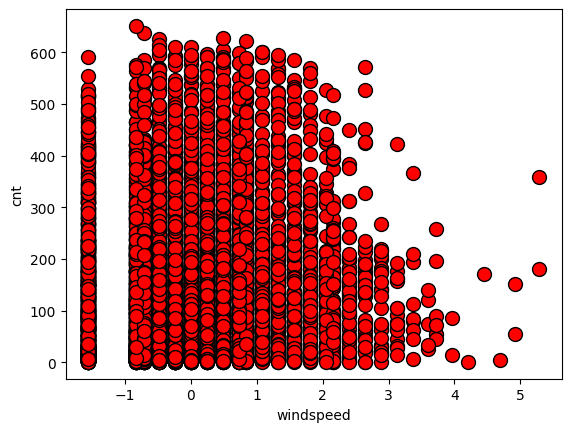

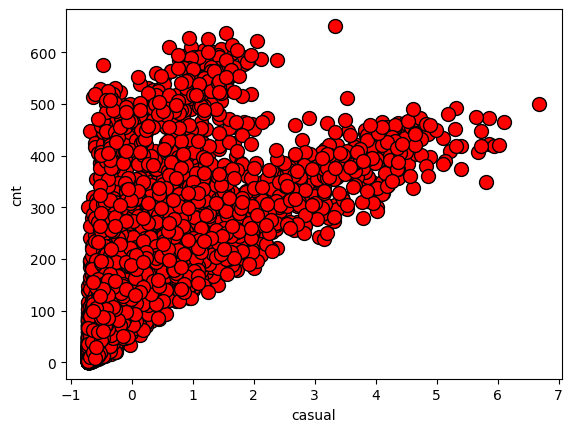

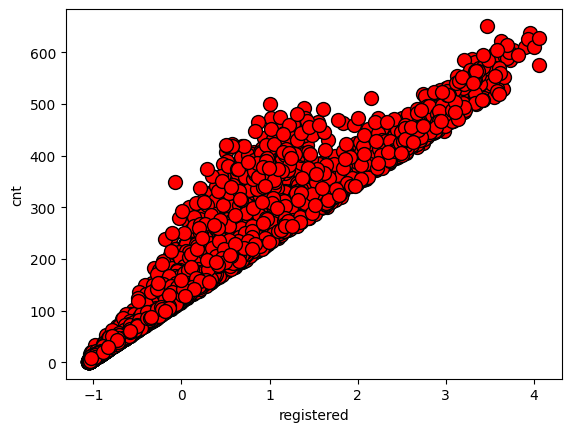

In [13]:
# Etiquetas para las columnas de X y la columna de Y
xlabel1 = "season"
xlabel2 = "mnth"
xlabel3 = "hr"
xlabel4 = "weekday"
xlabel5 = "weathersit)"
xlabel6 = "temp"
xlabel7 = "atemp"
xlabel8 = "hum"
xlabel9 = "windspeed"
xlabel10 = "casual"
xlabel11 = "registered"

ylabel1 = "cnt"

# Graficar los datos normalizados con la variable de salida
graficarDatos(X_norm[:, 0], y_regre, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y_regre, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y_regre, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y_regre, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y_regre, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y_regre, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y_regre, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y_regre, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y_regre, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y_regre, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y_regre, xlabel11, ylabel1)


### 1.4 Descenso por el gradiente
Primero agregamos unos a la matriz de X
#### 1.4.1 Cálculo del costo $J(\theta)$

In [14]:
# No olvidarse agregar unos a la matriz de X
X_ready = np.concatenate([np.ones((m_regre, 1)), X_norm], axis=1)

# Imprimimos X_ready para las primeras 12 columnas (1 columna de unos + 11 características)
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ready[:,0]', 'X_ready[:, 1]', 'X_ready[:, 2]', 'X_ready[:, 3]', 'X_ready[:, 4]', 'X_ready[:, 5]',
    'X_ready[:, 6]', 'X_ready[:, 7]', 'X_ready[:, 8]', 'X_ready[:, 9]', 'X_ready[:,10]', 'X_ready[:,11]'
))
print('-' * 120)

# Imprimir las primeras 10 filas del dataset preparado
for i in range(10):
    print('{:10.0f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5],
        X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))



X_ready[:,0]X_ready[:, 1]X_ready[:, 2]X_ready[:, 3]X_ready[:, 4]X_ready[:, 5]X_ready[:, 6]X_ready[:, 7]X_ready[:, 8]X_ready[:, 9]X_ready[:,10]X_ready[:,11]
------------------------------------------------------------------------------------------------------------------------
         1   -1.1360   -1.3392    0.0636    0.4960    0.8459   -0.6151   -0.6258    0.8854   -0.4795    0.0738    0.1693
         1   -1.1360   -0.7893    0.0636    0.4960    2.3639   -0.2146   -0.1187   -3.2260    0.2415   -0.6058   -0.7877
         1   -1.1360   -0.7893   -0.9528   -0.5000   -0.6721   -1.1156   -1.2171    0.5808    0.0009   -0.7145   -0.9592
         1    0.6062    0.8605   -0.9528    0.9941   -0.6721   -0.4149   -0.2877    0.6316    0.0009   -0.6602   -0.7877
         1    1.4773    1.1355   -0.0816   -0.9980   -0.6721    0.7865    0.8961    0.2763   -0.8393    3.0638    0.5936
         1    0.6062    0.8605    0.9348    0.9941   -0.6721    1.1869    1.2342    0.7839    0.0009    0.1825    2.34

In [15]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [16]:
# Supongamos que X_ready tiene 7 columnas
# Ajusta theta y theta1 a 7 elementos
theta = np.array([1,-1.1360  , -1.3392   , 0.0636 ,   0.4960  ,  0.8459  , -0.6151 ,  -0.6258  ,  0.8854 ,  -0.4795 ,   0.0738   , 0.1693])
theta1 = np.array([1,0.6062 ,   0.8605  , -0.9528  ,  0.9941  , -0.6721 ,  -0.4149  , -0.2877  ,  0.6316  ,  0.0009  , -0.6602  , -0.7877])

# Verifica la cantidad de columnas en X_ready
print(f"Cantidad de columnas en X_ready: {X_ready.shape[1]}")

# Imprimir el costo para theta y theta1
print(f"########################################################################################################")
print(f"Con theta: {theta} se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta)}")
print(f"########################################################################################################")
print(f"Con theta1: {theta1} se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta1)}")

Cantidad de columnas en X_ready: 12
########################################################################################################
Con theta: [ 1.     -1.136  -1.3392  0.0636  0.496   0.8459 -0.6151 -0.6258  0.8854
 -0.4795  0.0738  0.1693] se obtiene un costo de: 19110.476933646514
########################################################################################################
Con theta1: [ 1.000e+00  6.062e-01  8.605e-01 -9.528e-01  9.941e-01 -6.721e-01
 -4.149e-01 -2.877e-01  6.316e-01  9.000e-04 -6.602e-01 -7.877e-01] se obtiene un costo de: 19189.394815312407


####  Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.

In [17]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.001.

In [18]:
#creamos un theta con 7 columnas de ceros
theta = np.zeros(12)

#numero de iteraciones sera 10000 y un alpha 0.001
num_ite = 10000
alpha = 0.003

theta, J_historico = calcularDescensoGradiente(X_ready, y_regre, theta, alpha, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

########################################################################################################
Los valores de theta calculados son:
theta 1: 143.53499999998692
theta 2: 0.033567901221578884
theta 3: -0.032219048893739076
theta 4: 0.0002947180531158021
theta 5: 0.0008101769572572059
theta 6: 0.0005625486894199789
theta 7: -0.171275940754584
theta 8: 0.16967121217177167
theta 9: -0.002134763834191486
theta 10: 0.00758228233500327
theta 11: 36.78901138095692
theta 12: 110.76348578790856
########################################################################################################
con un costo de: 0.00031991065141156344 


Se utilizan los parametros finales para grafical la linea.

### Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

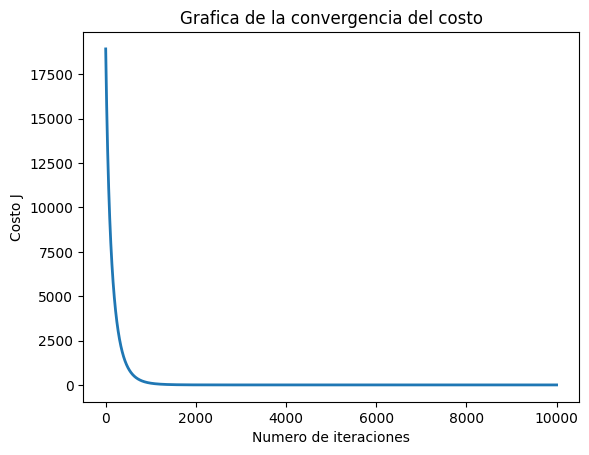

In [19]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#### 1.5.1 Grafica de la regresion lineal

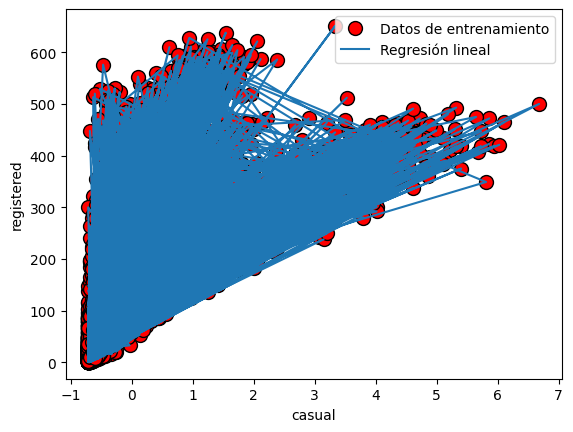

In [20]:
# Graficar los datos de entrenamiento de la columna 11 frente a la columna 10
graficarDatos(X_ready[:, 10], y_regre,xlabel10,xlabel11)

# Graficar la línea de regresión
# Aquí asumimos que estás graficando la relación entre X_ready[:,10] y X_ready[:,11]
pyplot.plot(X_ready[:, 10], np.dot(X_ready, theta), '-')

# Agregar leyenda
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])

# Mostrar el gráfico
pyplot.show()

### Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [21]:
# Haciendo pruebas con valores
y_pred = np.dot([1,-0.2649  , -0.7893  , -0.6624  , -0.5000  , -0.6721 ,  -1.2157  , -1.3862 ,  -1.1449  ,  1.3224 ,  -0.5786 ,   0.0971], theta)
print(y_pred)
# 133

133.0050652726746


In [22]:
# Haciendo pruebas con valores 2
y_pred = np.dot([1, 1.4773  ,  1.6854  ,  0.7896  ,  0.9941 ,  -0.6721  , -0.2146 ,  -0.1187 ,  -1.2972 ,  -1.5603 , -0.1709  ,  2.4715], theta)
print(y_pred)
#411

411.0032153970999


### Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### Creacion de la funcion del error cuadratico medio

In [25]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

#### haciendo calculo del error cuadratico medio

In [26]:
#haciendo x_test que es el 20% restante
m_ready_regre = len(y_regre_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready_regre, 1)), X_regre_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu_regre) / sigma_regre

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_regre_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 0.0006574808493310596
Raíz del Error Cuadrático Medio (RMSE) = 0.025641389379888517


In [27]:
from sklearn.metrics import r2_score

# Calcular R^2
r2 = r2_score(y_regre_test, y_predicha)

print(f"Coeficiente de determinación (R^2) = {r2}")


Coeficiente de determinación (R^2) = 0.9999999630740145


# 2 REGRESION POLINOMICA

In [39]:
# Importar PolynomialFeatures para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures

### Cargamos los datos del dataset

In [40]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset_Drive/LAB2_BicicletasPrestadas.csv', delimiter=',')

# Eliminar columnas no deseadas
data = data.drop(columns=['dteday', 'instant', 'workingday', 'holiday', 'yr'])

# Seleccionar solo las primeras 10,000 filas
data = data.iloc[:10000]


#Separando el 80% para entranamiento y el 20% para pruebas
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

X_poli_test = test_dataset.drop(['cnt'], axis=1).values
y_poli_test = test_dataset['cnt'].values

#Indicamos de que grado sera nuestro polinomio, en este caso de segundo grado
poly = PolynomialFeatures(degree=2)

# Seleccionamos las columnas para X y la columna 'price' para y
X_poli = poly.fit_transform(train_dataset.drop(['cnt'], axis=1).values)
y_poli = train_dataset['cnt'].values
m_poli = len(y_regre)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset
print(len(X_poli[1]))

# Mostrar el DataFrame resultante
data

78


,season,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,2,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,3,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,4,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,12,0,1,0.30,0.3030,0.39,0.1343,49,256,305
9996,1,2,13,0,1,0.32,0.3333,0.36,0.0000,58,267,325
9997,1,2,14,0,1,0.34,0.3485,0.31,0.0000,68,263,331
9998,1,2,15,0,1,0.36,0.3485,0.29,0.0000,72,281,353


### Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

En este caso hacemos el uso de la siguiente funcion para normalizar los datos

In [41]:
#X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_poli_ready], axis=1)  # Añadimos la columna de unos
X_norm_poli, mu_poli, sigma_poli = featureNormalize(X_poli)
X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_norm_poli], axis=1)

# Imprimimos algunos datos ya normalizados, y con 1 añadidos
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_poli[:,0]', 'X_poli[:,1]', 'X_poli[:,2]', 'X_poli[:,3]', 'X_poli[:,4]', 'X_poli[:,5]',
    'X_poli[:,6]', 'X_poli[:,7]', 'X_poli[:,8]', 'X_poli[:,9]', 'X_poli[:,10]', 'X_poli[:,11]','X_poli[:,12]'
))
print('-' * 140)

for i in range(10):
    print('{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(
        X_poli_ready[i, 0], X_poli_ready[i, 1], X_poli_ready[i, 2], X_poli_ready[i, 3], X_poli_ready[i, 4], X_poli_ready[i, 5],
        X_poli_ready[i, 6], X_poli_ready[i, 7], X_poli_ready[i, 8], X_poli_ready[i, 9], X_poli_ready[i, 10], X_poli_ready[i, 11],X_poli_ready[i, 12]
    ))

print('Media calculada:', mu_poli)
print('Desviación estándar calculada:', sigma_poli)

X_poli[:,0]X_poli[:,1]X_poli[:,2]X_poli[:,3]X_poli[:,4]X_poli[:,5]X_poli[:,6]X_poli[:,7]X_poli[:,8]X_poli[:,9]X_poli[:,10]X_poli[:,11]X_poli[:,12]
--------------------------------------------------------------------------------------------------------------------------------------------
    1.0000    0.0000   -1.1360   -1.3392    0.0636    0.4960    0.8459   -0.6151   -0.6258    0.8854   -0.4795    0.0738    0.1693
    1.0000    0.0000   -1.1360   -0.7893    0.0636    0.4960    2.3639   -0.2146   -0.1187   -3.2260    0.2415   -0.6058   -0.7877
    1.0000    0.0000   -1.1360   -0.7893   -0.9528   -0.5000   -0.6721   -1.1156   -1.2171    0.5808    0.0009   -0.7145   -0.9592
    1.0000    0.0000    0.6062    0.8605   -0.9528    0.9941   -0.6721   -0.4149   -0.2877    0.6316    0.0009   -0.6602   -0.7877
    1.0000    0.0000    1.4773    1.1355   -0.0816   -0.9980   -0.6721    0.7865    0.8961    0.2763   -0.8393    3.0638    0.5936
    1.0000    0.0000    0.6062    0.8605    0.9348    0.9

### Descenso por el gradiente
Una vez ya tenido los datos listos y normalizados, se procede al calculo del costo.

#### Cálculo del costo $J(\theta)$
Ejemplo de funcionamiento de la funcion **calcularCosto** con dos valores diferentes de $\theta$.

In [42]:
# Generar un vector aleatorio entre 0 y 1 con longitud 78
theta_poli = np.random.rand(len(X_poli_ready[1]))
theta_poli2 = np.random.rand(len(X_poli_ready[1]))
print(theta_poli.shape[0])

print(f"########################################################################################################")
print(f"con theta:{ theta_poli } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poli, theta_poli)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_poli2 } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poli, theta_poli2)}")

79
########################################################################################################
con theta:[0.20072179 0.33983131 0.93598546 0.60113883 0.30919265 0.36055597
 0.7141708  0.78458736 0.54843141 0.55720065 0.45466518 0.25935537
 0.00836379 0.15552183 0.46851151 0.21183667 0.26328154 0.90880434
 0.90128036 0.42258757 0.74075601 0.97473974 0.03412218 0.17264513
 0.46085434 0.77463046 0.59665327 0.65406598 0.78353107 0.36568149
 0.05778691 0.44486488 0.54987168 0.42820751 0.38621715 0.14446422
 0.04921393 0.65417881 0.21216639 0.61061959 0.47532548 0.44855394
 0.90139595 0.55316437 0.24429079 0.83603587 0.77079639 0.42616167
 0.61081894 0.99675586 0.42945582 0.80519032 0.47515889 0.57393097
 0.61512647 0.58480218 0.12578899 0.96967709 0.47606478 0.91279527
 0.40856499 0.2731213  0.52096657 0.68750527 0.61087406 0.2530029
 0.85737597 0.30797915 0.26204016 0.1950735  0.94154585 0.88717469
 0.0041493  0.85197591 0.25945221 0.77873864 0.98938642 0.19102955
 0.78186911]

#### Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decrecen en cada paso.

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.009.

In [43]:
#creamos un theta con 78 columnas de ceros
theta_poli = np.zeros(len(X_poli_ready[1]))

#numero de iteraciones sera 1000000 y un alpha 0.009
num_ite_poli = 500
alpha_poli = 0.009

theta_poli, J_historico_poli = calcularDescensoGradiente(X_poli_ready, y_poli, theta_poli, alpha_poli, num_ite_poli)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_poli:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_poli[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

########################################################################################################
Los valores de theta calculados son:
theta 1: 141.97262580869057
theta 2: 0.0
theta 3: 0.3144962864829961
theta 4: 0.1683028982426626
theta 5: 3.8776127881759628
theta 6: -0.5496438405453795
theta 7: -1.3846488269809314
theta 8: 2.6363296788160957
theta 9: 2.4762937317162
theta 10: -3.525732875426065
theta 11: -0.40917804275473724
theta 12: 9.065856941330413
theta 13: 23.3503715016504
theta 14: 0.4878879866585323
theta 15: 0.7536748346233741
theta 16: -1.0443865745224346
theta 17: -0.6492212603764378
theta 18: 0.24020343609075506
theta 19: -0.8642215050930332
theta 20: -1.033109000133719
theta 21: -0.7033601472576717
theta 22: -0.9347451653921262
theta 23: 2.2687559413577145
theta 24: 6.338855587791808
theta 25: 0.466485686472532
theta 26: -1.4661683095039035
theta 27: -0.5074149260438423
theta 28: 0.6306917402097937
theta 29: -1.0253415803996997
theta 30: -1.1728034718190221
theta 

Se utilizan los parametros finales para grafica la linea.

### Grafica de la convergencia del costo
graficamos el costo

[16532.095696135755, 14761.796200881445, 13503.997241667646, 12578.762775957053, 11872.330993739384, 11312.315131569745, 10852.2828099919, 10462.150698462363, 10122.188332429256, 9819.264466729916, 9544.488896761759, 9291.724295720593, 9056.641790461332, 8836.117411459996, 8627.843074676832, 8430.07324305584, 8241.457921415078, 8060.93099772154, 7887.634388595775, 7720.865598417661, 7560.040783660257, 7404.668234047307, 7254.328964735838, 7108.662247230595, 6967.354632716654, 6830.131490536565, 6696.750390727698, 6566.995861838689, 6440.675190752318, 6317.615023397528, 6197.658588937325, 6080.663414811995, 5966.499432059089, 5855.04739364117, 5746.197545742254, 5639.848504918531, 5535.906303813432, 5434.283575702576, 5334.898854003839, 5237.675967487695, 5142.543515554717, 5049.434410832852, 4958.285478652724, 4869.037104810286, 4781.63292451882, 4696.019546660541, 4612.146308429927, 4529.965056261465, 4449.429949589625, 4370.497284526861, 4293.125334988625, 4217.274209161043, 4142.905

Text(0, 0.5, 'Costo J')

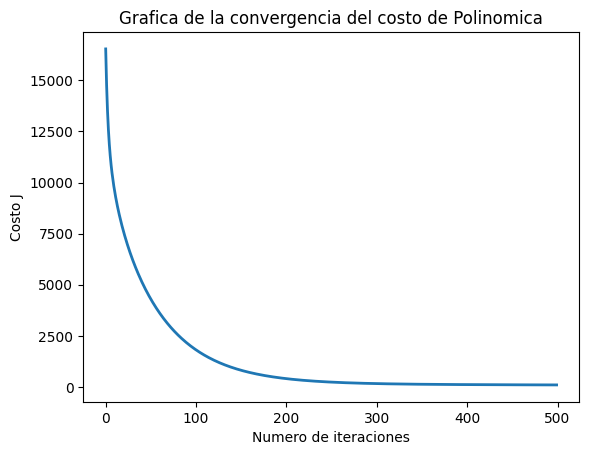

In [44]:
pyplot.plot(np.arange(len(J_historico_poli)), J_historico_poli, lw=2)
print(J_historico_poli)
pyplot.title("Grafica de la convergencia del costo de Polinomica")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### Grafica de la regresion Polinomica

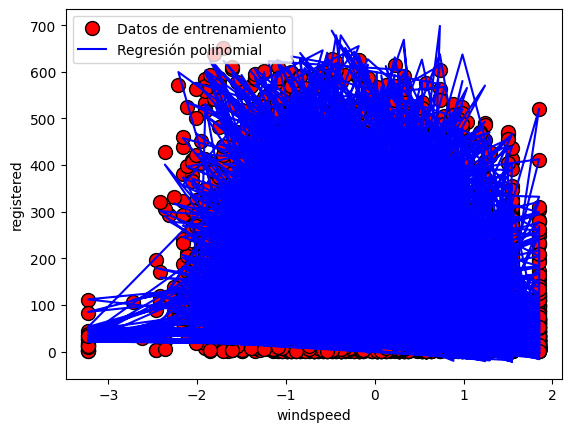

In [45]:
# Graficar los datos de entrenamiento de la columna 11 frente a la columna 9
graficarDatos(X_poli_ready[:, 9], y_poli, xlabel9, xlabel11)

# Graficar la curva de regresión polinomial
pyplot.plot(X_poli_ready[:, 9], np.dot(X_poli_ready, theta_poli), '-', color='blue')

# Agregar leyenda
pyplot.legend(['Datos de entrenamiento', 'Regresión polinomial'])

# Mostrar el gráfico
pyplot.show()


### Ejemplos de Predicciones
Se creo una matriz con ejemplos, donde se hace las predicciones correpondientes:

In [54]:
matriz_datos_poli = np.array([
                             [1,2,12,0,1,0.30,0.3030,0.39,0.1343,49,256],
                             [1,2,14,0,1,0.34,0.3485,0.31,0.0000,68,263],
                             [1,2,15,0,1,0.36,0.3485,0.29,0.0000,72,281],
                             [1,1,3,6,1,0.24,0.2879,0.75,0.0000,3,10],
                             ])


# Creamos un vector para almacenar cada Y predicha
y_pre_poli = []

# Copiamos la matriz de datos para preservar la original
matriz_datos_copy = matriz_datos_poli.copy()

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = PolynomialFeatures(degree=2)
matriz_datos_poli = poly_test.fit_transform(matriz_datos_poli)

matriz_datos_poli = np.concatenate([np.ones((matriz_datos_poli.shape[0], 1)), matriz_datos_poli], axis=1)

print(len(mu_poli))
print(len(sigma_poli))

# Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos_poli:
    datos[1:] = (datos[1:] - mu_poli) / sigma_poli

#reemplazamos las columnas de la pocision 0 porque este genera nan
matriz_datos_poli[:, 1] = 1

# Calculamos la Y predicha de los 11 ejemplos de predicción
for datos in matriz_datos_poli:
    y_pre_poli.append(np.dot(datos, theta_poli))


# Añadimos la columna de Y predicha a la matriz original
matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre_poli))


# Nombres de columnas
nombres_columnas = ['season', 'mnth', 'hr', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


#305 331 353


78
78
+----------+---------+---------+-----------+--------------+---------+---------+---------+-------------+----------+--------------+----------+
|   season |    mnth |      hr |   weekday |   weathersit |    temp |   atemp |     hum |   windspeed |   casual |   registered |      cnt |
+==========+=========+=========+===========+==============+=========+=========+=========+=============+==========+==============+==========+
|   1      |  2      | 12      |       0   |       1      |  0.3    |  0.303  |  0.39   |      0.1343 |  49      |     256      | 237.592  |
+----------+---------+---------+-----------+--------------+---------+---------+---------+-------------+----------+--------------+----------+
|   1      |  2      | 14      |       0   |       1      |  0.34   |  0.3485 |  0.31   |      0      |  68      |     263      | 250.504  |
+----------+---------+---------+-----------+--------------+---------+---------+---------+-------------+----------+--------------+----------+
|   1  

### Validaciones
Para hacer las validaciones correspondientes, se hizo el uso **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### haciendo calculo del error cuadratico medio

In [50]:
#haciendo x_test que es el 20% restante
m_ready_poli = len(y_poli_test)

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = PolynomialFeatures(degree=2)
datos_poli_test = poly_test.fit_transform(X_poli_test)

#añadimos los unos
datos_poli_test = np.concatenate([np.ones((datos_poli_test.shape[0], 1)), datos_poli_test], axis=1)



# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in datos_poli_test:
    datos_test[1:] = (datos_test[1:] - mu_poli) / sigma_poli

#reemplazamos las columnas de la pocision 0 porque este genera nan
datos_poli_test[:, 1] = 1

#creamos un array que almacenara cada una de las y_predicha
y_predicha_poli = []

for data_test_ready in datos_poli_test:
    y_predicha_poli.append(np.dot(data_test_ready, theta_poli))

mse = mean_squared_error(y_predicha_poli, y_poli_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

# Calcula el Coeficiente de Determinación R^2
r2 = r2_score(y_poli_test, y_predicha_poli)
print('Coeficiente de Determinación R^2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 188.9878869364236
Raíz del Error Cuadrático Medio (RMSE) = 13.747286529945594
Coeficiente de Determinación R^2 = 0.9893859053534836


## Ecuacion de la normal

Hacemos uso de la funcion de la Normal, haremos uso de los datos cargados en X para garantizar que las variables no esten modificadas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección

In [55]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

    return theta

### Agregando la columna de unos a la matriz $X$ para tener el termino de intersección

In [57]:
# Cargamos los datos utilizando pandasd
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset_Drive/LAB2_BicicletasPrestadas.csv', delimiter=',')


# Eliminar columnas no deseadas
dataset = data.drop(columns=['dteday', 'instant', 'workingday', 'holiday', 'yr'])
# Seleccionar solo las primeras 10,000 filas
dataset = dataset.iloc[:10000]


# Seleccionar aleatoriamente 5000 ejemplos
sampled_dataset = dataset.sample(n=5000, random_state=42)

train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

X_ecuaNorma_test = test_dataset.drop(['cnt'], axis=1).values
y_ecuaNorma_test = test_dataset['cnt'].values

# Seleccionamos las columnas para X y la columna 'cnt' para Y
X_ecuaNorma = train_dataset.drop(['cnt'], axis=1).values
y_ecuaNorma = train_dataset['cnt'].values
m_ecuaNorma = len(y_ecuaNorma)

#añadimos unos a la X
X_ren = np.concatenate([np.ones((m_ecuaNorma, 1)), X_ecuaNorma], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]', '  X_ren[:, 8]', '  X_ren[:, 9]', '  X_ren[:, 10]', '  X_ren[:, 11]'
))
print('-' * 260)

for i in range(10):
    print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}{:12.0f}{:14.0f}{:13.0f}{:14.0f}'.format(
        X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7], X_ren[i, 8], X_ren[i, 9], X_ren[i, 10], X_ren[i, 11]
    ))

X_ren[:,0]  X_ren[:, 1]  X_ren[:, 2]  X_ren[:, 3]  X_ren[:, 4]  X_ren[:, 5]  X_ren[:, 6]  X_ren[:, 7]  X_ren[:, 8]  X_ren[:, 9]  X_ren[:, 10]  X_ren[:, 11]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1           1           1              7             6           1            0             0           1             0            3            28
         1           3           7             14             2           1            1             1           0             0           41           111
         1           4          10              0             0           1            0             0           1             0           46            83
         1           1           3             10             4           1            0             0           1 

### Calculando Theta

In [58]:
# Calculamos thea haciendo uso de la funcion
theta2 = calcularThethaEcuacionNormal(X_ren, y_ecuaNorma);

print(f"########################################################################################################")

print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for tht2 in theta2:
    i += 1
    print(f"theta {i}: {tht2}")
print(f"########################################################################################################")

########################################################################################################
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: -1.2610357202902378e-11
theta 2: 8.770317805328887e-12
theta 3: -2.3127055825966636e-12
theta 4: -2.7258750812109156e-13
theta 5: 8.47655279301307e-13
theta 6: -6.87672141452822e-13
theta 7: -1.1893064311152557e-10
theta 8: 1.361399881716352e-10
theta 9: -7.064571150294796e-12
theta 10: 1.0253131677018246e-11
theta 11: 0.9999999999999953
theta 12: 0.999999999999998
########################################################################################################


### Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal

In [60]:
matriz_datos_ecuaNorma = np.array([
                             [1,1,2,12,0,1,0.30,0.3030,0.39,0.1343,49,256],
                             [1,1,2,14,0,1,0.34,0.3485,0.31,0.0000,68,263],
                             [1,1,2,15,0,1,0.36,0.3485,0.29,0.0000,72,281],
                             [1,1,1,3,6,1,0.24,0.2879,0.75,0.0000,3,10],
                             ])
#creamos un vector parta almacenar cada Y predicha
y_pre_ecua = []
#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_ecuaNorma:
    y_pre_ecua.append(np.dot(datos, theta2))

matriz_datos_ecuaNorma = np.column_stack((matriz_datos_ecuaNorma, y_pre_ecua))

nombres_columnas = ['season', 'mnth', 'hr', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_ecuaNorma.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+----------+--------+------+-----------+--------------+--------+---------+-------+-------------+----------+--------------+-------+
|    |   season |   mnth |   hr |   weekday |   weathersit |   temp |   atemp |   hum |   windspeed |   casual |   registered |   cnt |
+====+==========+========+======+===========+==============+========+=========+=======+=============+==========+==============+=======+
|  1 |        1 |      2 |   12 |         0 |            1 |   0.3  |  0.303  |  0.39 |      0.1343 |       49 |          256 |   305 |
+----+----------+--------+------+-----------+--------------+--------+---------+-------+-------------+----------+--------------+-------+
|  1 |        1 |      2 |   14 |         0 |            1 |   0.34 |  0.3485 |  0.31 |      0      |       68 |          263 |   331 |
+----+----------+--------+------+-----------+--------------+--------+---------+-------+-------------+----------+--------------+-------+
|  1 |        1 |      2 |   15 |         0 |   

### Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
m_ready = len(y_ecuaNorma_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_ecuaNorma_test], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta2))

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_predicha, y_ecuaNorma_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))


# Calculamos el coeficiente de determinación R^2
r2 = r2_score(y_ecuaNorma_test, y_predicha)

print('Coeficiente de Determinación (R^2) = ' + str(r2))

Error Cuadrático Medio (MSE) = 5.53808888212063e-23
Raíz del Error Cuadrático Medio (RMSE) = 7.441833700184806e-12
Coeficiente de Determinación (R^2) = 1.0
